In [1]:
import pandas as pd
import seaborn as sns
import pystan
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_directory = '../data/'

In [26]:
time_series = pd.read_csv(data_directory+'time_series.csv', index_col=0)
time_series_metadata = pd.read_csv(data_directory+'time_series_metadata.csv', index_col=0)

In [61]:
arma_model_code = """
data { 
int<lower=1> T; 
real y[T];
}

parameters { 
real mu; 
//real phi;
real<lower=-1,upper=1> theta; 
real<lower=0> sigma; 
} 

transformed parameters{
real K;
K <- sqrt( (1+theta^2) * sigma^2 );
}

model {
real err; 
mu ~ normal(0,1); 
theta ~ normal(0,1); //uniform(-1,1); //normal(0,2); 
sigma ~ student_t(4, 0, 2); //cauchy(0,5); 
err <- y[1] - 2*mu; //phi = 1
err ~ normal(0,sigma); 
for (t in 2:T){ 
    err <- y[t] - (mu + y[t-1] + theta * err); 
    err ~ normal(0,sigma);
    }
}
"""

# model {
# vector[T] nu; // prediction for time t
# vector[T] err; // error for time t
 
# nu[1] <- mu + mu; // assume err[0] == 0 
# err[1] <- y[1] - nu[1]; 
# for (t in 2:T) { 
#     nu[t] <- mu +  y[t-1] + theta * err[t-1]; 
#     err[t] <- y[t] - nu[t];
#     } 

# mu ~ normal(0,10); // priors
# phi ~ normal(0,2); 
# theta ~ normal(0,2); 
# sigma ~ cauchy(0,5); 
# err ~ normal(0,sigma); // likelihood
# }
# """

In [62]:
arma_model = pystan.StanModel(model_code=arma_model_code)

In [63]:
random_walk_parameters = pd.DataFrame(columns=['mu', 'K', 'theta', 'sigma'], dtype='float')

for col in time_series.columns:
    if time_series_metadata.ix[col,'Source']!='Farmer_Lafond':
        continue
    print(col)
    d = time_series[col].dropna().values.astype('float')
    data = {'y':log(d),
       'T':len(d)}
    fit = arma_model.sampling(data=data)
    random_walk_parameters.ix[col, 'mu'] = fit['mu'].mean()
    random_walk_parameters.ix[col, 'K'] = fit['K'].mean()
    random_walk_parameters.ix[col, 'theta'] = fit['theta'].mean()
    random_walk_parameters.ix[col, 'sigma'] = fit['sigma'].mean()
# random_walk_parameters = random_walk_parameters.astype('float')

AcrylicFiber
Acrylonitrile
Aluminum
Ammonia
Aniline
Automotive (US)
Beer (Japan)
Benzene
BisphenolA
Caprolactam
CarbonBlack
CarbonDisulfide
CCGT Power
Concentrating Solar
Corn (US)
Crude Oil
Cyclohexane
DNA Sequencing
DRAM
Electric Range
Ethanol (Brazil)
Ethanolamine
Ethylene
Formaldehyde
Free Standing Gas Range
Geothermal Electricity
Hard Disk Drive
HydrofluoricAcid
IsopropylAlcohol
Laser Diode
Low Density Polyethylene
Magnesium
MaleicAnhydride
Methanol
Milk (US)
Monochrome Television
Motor Gasoline
NeopreneRubber
Nuclear Electricity
Onshore Gas Pipeline
Paraxylene
Pentaerythritol
Phenol
Photovoltaics
PhthalicAnhydride
PolyesterFiber
PolyethyleneHD
PolyethyleneLD
Polypropylene
Polystyrene
Polyvinylchloride
Primary Aluminum
Primary Magnesium
Refined Cane Sugar
Sodium
SodiumChlorate
SodiumHydrosulfite
Sorbitol
Styrene
Titanium Sponge
Titanium Dioxide
Transistor
Urea
VinylAcetate
VinylChloride
Wind Turbine (Denmark)


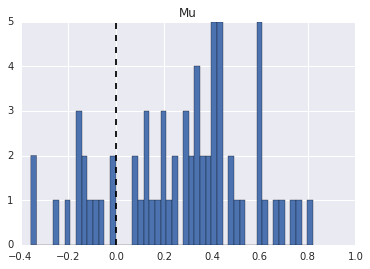

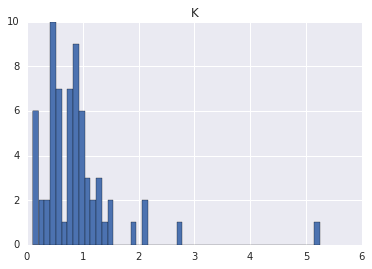

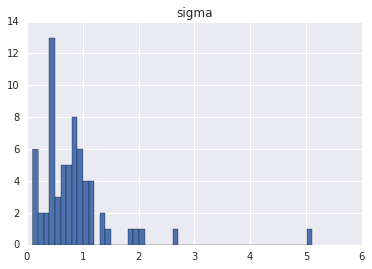

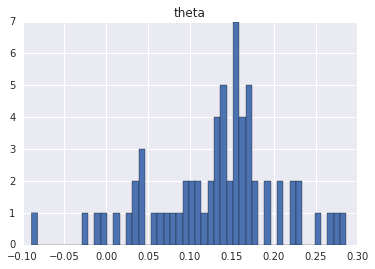

In [64]:
random_walk_parameters['mu'].hist(bins=50)
plot((0,0), ylim(), 'k--')
title("Mu")
figure()
random_walk_parameters['K'].hist(bins=50)
title("K")
figure()
random_walk_parameters['sigma'].hist(bins=50)
title("sigma")
figure()
random_walk_parameters['theta'].hist(bins=50)
title("theta")

In [65]:
random_walk_log_parameters = log(random_walk_parameters)

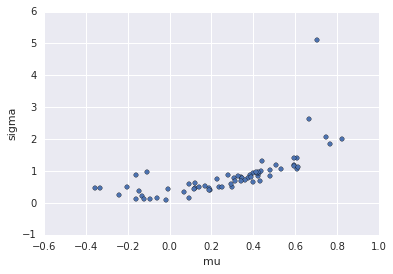

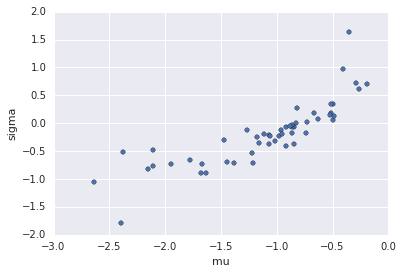

In [66]:
random_walk_parameters.plot('mu', 'sigma', kind='scatter')
figure()
random_walk_log_parameters.plot('mu', 'sigma', kind='scatter')

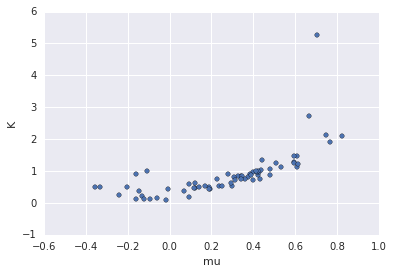

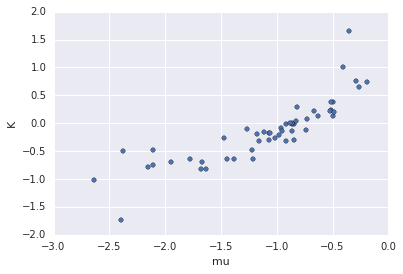

In [67]:
random_walk_parameters.plot('mu', 'K', kind='scatter')
figure()
random_walk_log_parameters.plot('mu', 'K', kind='scatter')

In [33]:
from scipy.stats import linregress
linregress(random_walk_parameters['mu'], random_walk_parameters['K'])

LinregressResult(slope=1.6321206783660303, intercept=0.32010735426459691, rvalue=0.91392666902582853, pvalue=9.3833664997008845e-27, stderr=0.090604106468375606)